<center>
    <img src="https://i.ibb.co.com/m5hwhf2/HDC-Anca.png" width="300">
    <h1><b>Loan Risk Assesment - by Heptad Data Collector</b></h1>
</center>

**Members of Heptad Data Collector**

1. Farah Fitria Sari
2. Aditya Fajri Melinianto
3. Apri Ansyah
5. Oktafina Pingkan Purwanto
6. Pancaran Ratna Mustika
7. Ryan Fajar
8. Tiara Lailatul Nikmah

- **Tools**

![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)
![Featuring](https://img.shields.io/badge/Using-Python-blue?style=for-the-badge&logo=python)

- **Dataset**

Large and rich dataset from the U.S. Small Business Administration (SBA): [Should This Loan be Approved or Denied?](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied "Should This Loan be Approved or Denied?")

# Business Understanding

## Latar Belakang

<center>
    <img src="https://www.sba.gov/themes/custom/sba/dist/img/social/SBASEOImage.jpg" width="700">
</center>

U.S. Small Business Administration (SBA) didirikan pada tahun 1953, dengan tujuan untuk mendukung usaha kecil di pasar kredit Amerika dalam ``mengurangi pengangguran dan menciptakan lapangan kerja``. Salah satu cara SBA membantu usaha kecil adalah ``melalui program jaminan pinjaman untuk mendorong bank memberikan kredit kepada usaha kecil``. Jika peminjam gagal bayar, maka SBA akan menanggung sebagian dari pinjaman. Meskipun SBA bertindak untuk mengurangi resiko bank dengan cara membayar sebagian jumlah kerugian bank sesuai dengan yang telah dijaminkan diawal, kejadian gagal bayar (loan default) menimbulkan pertanyaan tentang efektivitas inisiatif tersebut dan dampaknya terhadap stabilitas keuangan bank dan ekonomi.


## Problem Statement

SBA sebagai lembaga penjamin untuk bank bagi para UMKM ingin ``menurunkan loan default rate`` dari usaha-usaha yang mereka loloskan / jaminkan.
    

## Roles

Sebagai sekelompok tim data scientist, tim Heptad Data Collector diminta untuk melakukan analisa dan membuat model yang bisa memprediksi apakah pinjaman ini bisa diterima/tidak berdasarkan dataset yang dimiliki oleh perusahaan Small Business Administration Amerika Serikat (SBA).

Selain itu, tim Heptad Data Collector juga diminta untuk mempresentasikan solusi mereka terhadap client, yaitu SBA itu sendiri. Solusi tersebut bisa berupa rekomendasi bisnis, dampak bisnis (business impact), atau simulasi bisnis (business simulation):

* PIC Data Cleansing: ``Tiara Lailatul Nikmah``
* PIC Feature Engineering: ``Ryan Fajar``
* PIC Data Exploration: ``Oktafina Pingkan Purwanto``
* PIC EDA: ``Apri Ansyah``
* PIC Insights and Visualization: ``Farah Fitria Sari``
* PIC Modelling and Evaluation: ``Aditya Fajri Melinianto``

## Goals

Mengembangkan data driven decision making system yang ``robust``, memanfaatkan data demografis perusahaan untuk menilai ``kelayakan pinjaman`` UMKM dengan akurat.


## Objectives
1. Data preprocessing & cleansing
2. Identifikasi potensi resiko dengan EDA, dengan visualisasi
3. Membuat model machine learning
4. Menentukan metrics evaluation yang tepat
5. Monitoring & reporting (mentranslate hasil pemodelan dan evaluasi ke dalam ranah bisnis).

## Business Metrics
<img src="https://i.ibb.co.com/pXXGy6X/2024-05-16-18-23-14-Stage-0-PT-Heptad-Data-Collector-Kelompok-4-DS-Batch-43-pptx-Google-Slide.png">

# **Stage 1A Data Pre-Processing**

## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Core Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# General Library
from datetime import datetime
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Model Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [ ]:
source = 'SBAnational.csv'
df = pd.read_csv(source)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## Data Understanding

In [ ]:
print("Dimensi data :", df.shape)
print("Jumlah baris :", df.shape[0])
print("Jumlah kolom :", df.shape[1])

Dimensi data : (899164, 27)
Jumlah baris : 899164
Jumlah kolom : 27


In [ ]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [ ]:
# basic info tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

Dari info diatas, bisa didapatkan informasi sebagai berikut

* Dataset memiliki 27 columns dan 899164 rows data
* Terdapat 3 jenis tipe data yaitu : int64, object, float64
* Cukup banyak kolom yang memiliki missing values, terutama pada ChgOffDate

Pertimbangan pada saat data pre-processing

* Menghapus kolom ChgOffDate karena terlalu banyak missing value
* Menggunakan metode imputation untuk menangani missing value yang lain

## A. Handling Missing Value

In [ ]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
print('Missing values status:', df.isnull().values.any())
missing_percentage = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
missing_percentage['Percentage'] = (missing_percentage['Total Null Values']/df.shape[0])*100
missing_percentage["Data Type"] = [df[col].dtype for col in df.columns]
missing_percentage.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
missing_percentage.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
ChgOffDate,736465,81.905526,object
RevLineCr,4528,0.503579,object
LowDoc,2582,0.287156,object
DisbursementDate,2368,0.263356,object
MIS_Status,1997,0.222095,object
BankState,1566,0.174162,object
Bank,1559,0.173383,object
NewExist,136,0.015125,object
City,30,0.003336,object
State,14,0.001557,int64


- Kolom ChargeOffDate, ``Missing Value lebih dari 80%`` maka kolom dihapus

In [ ]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [ ]:
# Menghapus kolom ChgoffDate karena terlalu banyak missing value
df = df.drop(['ChgOffDate'], axis=1)

- Menghapus baris data jika terdapat missing value pada kolom ``target yaitu MIS_Status``
- Setelah itu, untuk kolom lain yang memiliki NaN seperti kolom ``Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, DisbursementDate,`` Missing Value hanya dibawah 0,5%, maka hanya dihapus baris yang mengandung NaN

In [ ]:
# Menghapus baris jika terdapat missing value pada kolom MIS_Status
df.dropna(subset=['MIS_Status'], inplace=True)

In [ ]:
df.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate'], inplace=True)

## B. Handle duplicate data

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [ ]:
df.duplicated().value_counts()

False    886240
Name: count, dtype: int64

Dari info diatas, bisa didapatkan informasi sebagai berikut
* **Tidak ada data yang duplikat**

## C. Feature Transformation

1. Mengubah kolom ``object`` ke ``numerik`` (DisbursementGross, BalanceGross, GrAppv, SBA_Appv) diganti ke float
2. Menghilangkan ``nilai 0`` pada: NAICS (memasukan ke kategori 81), Term & NoEmp (diganti dengan nilai median), NewExist & UrbanRural (diganti dengan nilai modus)
3. Menghilangkan nilai ``bukan Y atau N`` pada kolom LowDoc dan RevLineCr (diganti dengan nilai modus (N))
4. Menghilangkan ``3 karakter terakhir`` pada kolom NAICS
5. Mengganti ``0 dan 1`` pada kolom FranchiseCode menjadi ``Not-Franchise`` dan selain itu menjadi ``Franchise``
6. Mengganti Nilai ``1976A`` pada kolom ApprovalFY diganti menjadi ``1976``
7. Untuk Bank dengan ``count < 1500`` akan dimasukkan ke kategori ‘Others’
8. NAICS diubah menjadi nama-nama industri setiap kategori ``0 sampai 92``
9. Term dikelompokkan menjadi 4 bagian ``(0-60 bulan, 60-120 bulan, 120-Upper IQR, dan > Upper IQR)``

### 1. Mengubah kolom object ke numerik (DisbursementGross, BalanceGross, GrAppv, SBA_Appv) diganti ke float

- Karena kolom tersebut termasuk ``nominal angka``, maka akan dirubah terlebih dahulu ke tipe data ``float``
- Akan tetapi, nantinya fitur ini tidak akan digunakan karena tidak relevan untuk dijadikan prediktor

In [ ]:
#Merubah Kolom Currency menjadi float
curr_col = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[curr_col] = df[curr_col].replace('[\$,]', '', regex=True).astype(float)

### 2a. Menghilangkan nilai 0 pada: NAICS (memasukan ke kategori 81)

- NAICS merepresentasikan industri peminjam, disini akan memasukan industri yang memiliki nilai 0 yang ada pada dataset ke sektor others, yaitu kategori 81

In [ ]:
df['NAICS'].value_counts()

NAICS
0         198267
722110     27772
722211     19338
811111     14392
621210     13856
           ...  
331411         1
336414         1
311351         1
316212         1
514190         1
Name: count, Length: 1311, dtype: int64

In [ ]:
df['NAICS'] = df['NAICS'].replace({0: 81})
df.NAICS.value_counts()

NAICS
81        198267
722110     27772
722211     19338
811111     14392
621210     13856
           ...  
331411         1
336414         1
311351         1
316212         1
514190         1
Name: count, Length: 1311, dtype: int64

### 2b. Menghilangkan nilai 0 pada Term & NoEmp (diganti dengan nilai median)

- Term 0 akan di replace dengan median, karena angsuran tidak mungkin bernilai 0
- Sama halnya dengan NoEmp, nilai yang bernilai 0 akan diisi dengan nilai median

In [ ]:
df['Term'] = df['Term'].replace({0: df['Term'].median()})
df.Term.value_counts()

Term
84     226620
60      88507
240     84964
120     76712
300     44395
        ...  
396         1
438         1
382         1
367         1
429         1
Name: count, Length: 410, dtype: int64

In [ ]:
df['NoEmp'] = df['NoEmp'].replace({0: df['NoEmp'].median()})
df.NoEmp.value_counts()

NoEmp
1       151454
2       136321
3        89355
4        79141
5        59520
         ...  
660          1
4953         1
464          1
339          1
3713         1
Name: count, Length: 596, dtype: int64

### 2c. Menghilangkan nilai 0 pada NewExist & UrbanRural (diganti dengan nilai modus)

- Nilai 0 pada kolom NewExist akan digantikan dengan modus karena termasuk categorical feature

In [ ]:
df['NewExist'].mode()

0    1.0
Name: NewExist, dtype: float64

In [ ]:
df['NewExist'] = df['NewExist'].replace({0: 1})
df['NewExist'] = df['NewExist'].astype(int)
df.NewExist.value_counts()

NewExist
1    637160
2    249080
Name: count, dtype: int64

- Nilai 0 pada kolom UrbanRural juga akan digantikan dengan modus karena termasuk categorical feature

In [ ]:
df['UrbanRural'].mode()

0    1
Name: UrbanRural, dtype: int64

In [ ]:
df['UrbanRural'] = df['UrbanRural'].replace({0: 1})
df['UrbanRural'] = df['UrbanRural'].astype('int')
df.UrbanRural.value_counts()

UrbanRural
1    782165
2    104075
Name: count, dtype: int64

### 3. Menghilangkan nilai bukan Y atau N pada kolom LowDoc dan RevLineCr (diganti dengan nilai modus)

In [ ]:
df['LowDoc'] = np.where((df['LowDoc'] != 'N') & (df['LowDoc'] != 'Y'), 'N', df.LowDoc)
df.LowDoc.value_counts()

LowDoc
N    778346
Y    107894
Name: count, dtype: int64

In [ ]:
df['LowDoc'] = df.apply(lambda row: 1 if row['LowDoc'] == 'Y' else 0, axis=1)

In [ ]:
df['RevLineCr'] = np.where((df['RevLineCr'] != 'N') & (df['RevLineCr'] != 'Y'), 'N', df.RevLineCr)
df.RevLineCr.value_counts()

RevLineCr
N    687973
Y    198267
Name: count, dtype: int64

In [ ]:
df['RevLineCr'] = df.apply(lambda row: 1 if row['RevLineCr'] == 'Y' else 0, axis=1)

### 4. Menghilangkan 3 karakter terakhir pada kolom NAICS

In [ ]:
# Menangani kolom NAICS, kita akan meerubahnya menjadi nama sektornya dan membuat kolom rate default setiap sektornya
# Berdasarkan guideline, dua  digit di awal adalah kode industrinya

ind_code = df['NAICS']

#Fungsi untuk mengambil ambil 2 digit awal dari kodenya
def get_code(ind_code):
    if ind_code <= 0:
        return 0
    return (ind_code // 10 ** (int(math.log(ind_code, 10)) - 1))

In [ ]:
# Membuat kolom baru yaitu ind_code
df['ind_code'] = df.NAICS.apply(get_code)

In [ ]:
df['ind_code'].value_counts()

ind_code
81    270021
44     83867
72     67084
54     66951
23     65635
62     54633
42     48148
45     41895
33     37740
56     32114
48     19955
32     17709
71     14460
53     13457
31     11660
51     11220
52      9378
11      8868
61      6313
49      2180
21      1820
22       654
55       256
92       222
Name: count, dtype: int64

### 5. Mengganti 0 dan 1 pada kolom FranchiseCode menjadi Not-Franchise dan selain itu menjadi Franchise

In [ ]:
df.FranchiseCode.value_counts()

FranchiseCode
1        631412
0        203625
78760      3342
68020      1917
50564      1023
          ...  
83876         1
12545         1
68170         1
69145         1
15930         1
Name: count, Length: 2754, dtype: int64

In [ ]:
# Melihat kolom FranchiseCode, berdasarkan guideline
# Jika kolom FranchiseCode = 0 atau = 1 maka dia tidak ada frnachise, selain itu maka dia ada franchise

df['FranchiseCode'] = np.where((df.FranchiseCode != 0 ) & (df.FranchiseCode != 1 ),'Franchise','Not-Franchise')
# df['FranchiseCode'] = df['FranchiseCode'].replace('0.0', 'Not-Franchise')
# df['FranchiseCode'] = df['FranchiseCode'].replace('1.0', 'Not-Franchise')
df.FranchiseCode.value_counts()

FranchiseCode
Not-Franchise    835037
Franchise         51203
Name: count, dtype: int64

In [ ]:
df['FranchiseCode'] = df.apply(lambda row: 1 if row['FranchiseCode'] == 'Franchise' else 0, axis=1)

### 6. Mengganti Nilai 1976A pada kolom ApprovalFY diganti menjadi 1976

In [ ]:
#Merubah kolom ApprovalFY menjadi integer, walaupun sebenrnya dia adalah tahun, tapi agar lebih mudah
df['ApprovalFY'].replace('1976A', 1976, inplace=True)
df['ApprovalFY']= df['ApprovalFY'].astype(int)

### 7. Untuk Bank dengan count < 1500 akan dimasukkan ke kategori ‘Others’

Membuat variabel baru yang mengandung jumlah masing-masing kemunculan bank

In [ ]:
bank_counts = df['Bank'].value_counts()

In [ ]:
bank_counts

Bank
BANK OF AMERICA NATL ASSOC        86075
WELLS FARGO BANK NATL ASSOC       62934
JPMORGAN CHASE BANK NATL ASSOC    47460
U.S. BANK NATIONAL ASSOCIATION    34752
CITIZENS BANK NATL ASSOC          33569
                                  ...  
AMER BK & TR WISCONSIN                1
BANK OF IDAHO HOLDING COMPANY         1
APPLE CREEK BK. CO                    1
HERITAGE BK E. BAY A DIVISION         1
DEPCO                                 1
Name: count, Length: 5788, dtype: int64

Membuat variabel baru lagi untuk mengelompokkan bank yang hanya muncul kurang dari 1500x saja

In [ ]:
banks_to_replace = bank_counts[bank_counts < 1500].index

In [ ]:
df['Bank'] = df['Bank'].apply(lambda x: 'Others' if x in banks_to_replace else x)

Hasil setelah pengelompokkan bank

In [ ]:
df['Bank'].value_counts()

Bank
Others                            317633
BANK OF AMERICA NATL ASSOC         86075
WELLS FARGO BANK NATL ASSOC        62934
JPMORGAN CHASE BANK NATL ASSOC     47460
U.S. BANK NATIONAL ASSOCIATION     34752
CITIZENS BANK NATL ASSOC           33569
PNC BANK, NATIONAL ASSOCIATION     27148
BBCN BANK                          22814
CAPITAL ONE NATL ASSOC             22220
MANUFACTURERS & TRADERS TR CO      11150
READYCAP LENDING, LLC              10616
THE HUNTINGTON NATIONAL BANK        9520
KEYBANK NATIONAL ASSOCIATION        9186
TD BANK, NATIONAL ASSOCIATION       8901
BRANCH BK. & TR CO                  8028
ZIONS FIRST NATIONAL BANK           7897
CALIFORNIA BANK & TRUST             7476
CITIBANK, N.A.                      7402
REGIONS BANK                        7143
BANCO POPULAR NORTH AMERICA         7135
COMERICA BANK                       6991
BANK OF THE WEST                    6628
COMPASS BANK                        6384
BUSINESS LOAN CENTER, LLC           6262
GE CAP. SMA

### 8. NAICS diubah menjadi nama-nama industri setiap kategori 0 sampai 92

In [ ]:
#Merubah 2 digit menjadi nama sektor
def industri(i):
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance',
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise',
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 92:'Public Administration'
               }
    if i in def_code:
        return def_code[i]

In [ ]:
df['Industri'] = df.ind_code.apply(industri)
df['Industri'].value_counts()

Industri
Other Servieces (Ex: Public Administration)                        270021
Retail Trade                                                       125762
Manufacturing                                                       67109
Accomodation & Food Service                                         67084
Professional, Scientific & Technical Service                        66951
Constuction                                                         65635
Health Care & Social Assistance                                     54633
Wholesale Trade                                                     48148
Administrative, Support, Waste Management & Remediation Service     32114
Transportation & Warehousing                                        22135
Arts, Entertainment & Recreation                                    14460
Real Estate, Rental & Leasing                                       13457
Information                                                         11220
Finance & Insurance          

Setelah dikelompokan dengan masinng-masing industrinya, maka selanjutnya akan dilakukan label encoding pada bagian Stage 1B setelah Stage 2 EDA.

### 9. Term dikelompokkan menjadi 4 bagian (0-60 bulan, 60-120 bulan, 120-Upper IQR, dan > Upper IQR)

In [ ]:
#Menentukan Upper IQR Term
Q1 = df['Term'].quantile(0.25)
Q3 = df['Term'].quantile(0.75)
IQR = Q3 - Q1

upper_IQR = Q3 + 1.5 * IQR
upper_IQR

210.0

In [ ]:
#Mengelompokkan menjadi 4 bagian
bins = [0, 60, 120, upper_IQR, float('inf')]
labels = ['0 to 60', '60 to 120', f'120 to {upper_IQR}', f'more than {upper_IQR}']
df['Term'] = pd.cut(df['Term'], bins=bins, labels=labels, right=False, include_lowest=True)
print(df[['Term']])

                   Term
0             60 to 120
1             60 to 120
2          120 to 210.0
3             60 to 120
4       more than 210.0
...                 ...
899159        60 to 120
899160        60 to 120
899161        60 to 120
899162        60 to 120
899163          0 to 60

[886240 rows x 1 columns]


# **Stage 1C Feature Engineering**

## A. Feature Selection

Sebagai fitur target, ``MIS_status`` akan dilakukan label encoding ``ChargeOff = 1``, ``PIF=0`` terlebih dahulu sebelum dicek korelasinya terhadap fitur numerikal lain.

In [ ]:
df['MIS_Status'] = df['MIS_Status'].replace({'P I F': 0, 'CHGOFF':1}).astype(int)
df.MIS_Status.value_counts()

MIS_Status
0    730199
1    156041
Name: count, dtype: int64

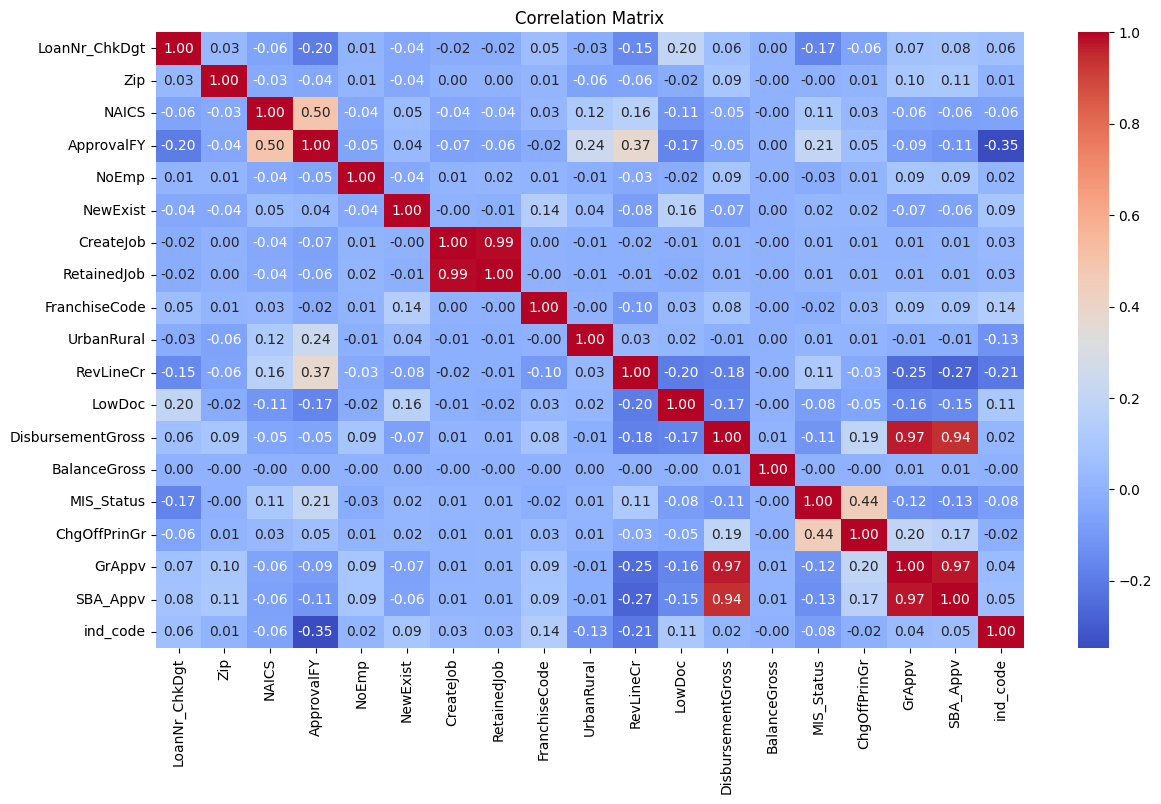

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 1. Berdasarkan heatmap correlation diatas, berikut adalah fitur yang kami putuskan untuk pertahankan beserta dengan penjelasannya

1. ``Term`` : Merupakan jumlah angsuran yang diberikan kepada peminjam (dalam bentuk bulan)
2. ``NoEmp`` : Jumlah karyawan yang terdapat pada UMKM peminjam
3. ``CreateJob`` : Jumlah pekerjaan yang tercipta dari UMKM tersebut
4. ``RetainedJob`` : Jumlah pekerjaan yang berhasil dipertahankan dari UMKM tersebut
5. ``NewExist`` : Mengklasifikasi apakah UMKM tersebut termasuk baru atau lama
6. ``UrbanRural`` : Letak dari UMKM tersebut apakah berada pada pedesaan / perkotaan
7. ``NAICS / Industri`` : Kode klasifikasi Industri yang ditetapkan oleh Amerika Utara
8. ``FranchiseCode`` : Apakah UMKM atau usaha tersebut termasuk franchise atau tidak
9. ``LowDoc`` : Apakah pinjaman yang diajukan tersebut support low doc
10. ``RevLineCr`` : Status Jalur kredit bergulir, Y = ya / N = tidak
11. ``MIS_Status`` : Kolom target yang menyatakan lunas atau gagal bayar
12. ``Bank`` : Nama bank yang mengeluarkan pinjaman
13. ``State`` : Negara bagian peminjam
14. ``BankState`` : Negara bagian bank yang mengeluarkan pinjaman

### 2. Adapun beberapa fitur yang kami putuskan untuk hilangkan beserta dengan penjelasannya

1. ``ApprovalDate`` : Tidak cocok dijadikan prediktor karena kita akan memprediksi sebelum pinjaman tersebut di approve
2. ``DisbursementDate`` : Tidak cocok juga dijadikan prediktor, karena pencairan hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
3. ``ChgOffDate`` : Karena terlalu banyak missing value
4. ``Zip`` : Memiliki kardinalitas yang tinggi
5. ``City`` : Memiliki kardinalitas yang tinggi
6. ``LoanNr_ChkDgt``: Primary key
7. ``Name`` : Nama seseorang tidak bisa dijadikan prediktor, selain itu memiliki kardinalitas yang tinggi juga
8. ``SBA_Appv`` : Tidak cocok dijadikan prediktor, karena approval hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
9. ``GrAppv`` : Tidak cocok dijadikan prediktor, karena approval hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
10. ``ChgOffPrinGr`` : Mirip seperti kolom target, sehingga akan menimbulkan data leaking jika dijadikan feature
11. ``DisbursementGross``: Tidak cocok juga dijadikan prediktor, karena pencairan hanya akan terjadi ketika pinjaman sudah disetujui, sedangkan kita memprediksi sebelum kejadian itu berlangsung
12. ``BalanceGross`` : Tidak cocok untuk menjadi prediktor
13. ``ApprovalFY`` : Tidak cocok untuk menjadi prediktor

## B. Feature Extraction

Feature yang ditambah:
1. ``BankIsIn`` -> Jika BankState = State, maka 1, jika tidak 0
2. ``CompanyType`` -> Jika NewExist dan UrbanRural = 1, maka 1. Jika NewExist = 1 tapi UrbanRural = 2, maka 2. Jika NewExist = 2 tapi UrbanRural = 1, maka 3. Jika NewExist dan UrbanRural = 2, maka 4.
3. ``Prod`` -> Jika CreatedJob > RetainedJob maka 1, jika tidak 0
4. ``Membuat kolom baru Recession`` = tahun terjadinya resesi di USA, yaitu Desember 2007 hingga Juni 2009

### 1. Membuat fitur tambahan BankIsIn

In [ ]:
df['BankIsIn'] = df.apply(lambda row: 1 if row['BankState'] == row['State'] else 0, axis=1)
print("\n Data setelah membuat fitur BankIsIn:")
print(df['BankIsIn'].value_counts())


 Data setelah membuat fitur BankIsIn:
BankIsIn
1    467968
0    418272
Name: count, dtype: int64


### 2. Membuat fitur tambahan CompanyType

In [ ]:
df['CompanyType'] = df.apply(lambda row: 'ExistUrban' if row['NewExist'] == 1 and row['UrbanRural'] == 1 else ('ExistRural' if row['NewExist'] == 1 else ('NewUrban' if row['UrbanRural'] == 1 else 'NewExist')), axis=1)
print("\nData setelah membuat fitur CompanyType:")
print(df['CompanyType'].value_counts())


Data setelah membuat fitur CompanyType:
CompanyType
ExistUrban    567586
NewUrban      214579
ExistRural     69574
NewExist       34501
Name: count, dtype: int64


### 3. Membuat fitur tambahan Prod

In [ ]:
df['Prod'] = df.apply(lambda row: 1 if row['CreateJob'] > row['RetainedJob'] else 0, axis=1)
print("\nData setelah membuat fitur Prod:")
print(df['Prod'].value_counts())


Data setelah membuat fitur Prod:
Prod
0    793101
1     93139
Name: count, dtype: int64


### 4. Membuat fitur tambahan Recession

In [ ]:
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

# Tentukan tanggal awal dan akhir dari Resesi Besar
start_date = pd.to_datetime('01-12-2007')
end_date = pd.to_datetime('30-06-2009')

# Atur nilai "Recession" menjadi 1 jika ApprovalDate berada dalam rentang waktu resesi
df['Recession'] = df['DisbursementDate'].apply(lambda x: 1 if start_date <= x <= end_date else 0)
print(df['Recession'].value_counts())

Recession
0    771003
1    115237
Name: count, dtype: int64


# **Stage 1B - Feature Transformation**

## A. Feature Encoding

1. Kolom ``NAICS`` akan dilakukan ``label encoding``
2. Melakukan label encoding terhadap kolom ``bank`` dengan frekuensi kemunculan 60 teratas
3. Melakukan label encoding terhadap kolom ``State``
4. Melakukan label encoding terhadap kolom ``BankState``

### 1. NAICS akan dilakukan label encoding

In [ ]:
# Melakukan label encoding
label_encode = ['Industri']
label_encoder = LabelEncoder()
df[label_encode] =df[label_encode].apply(LabelEncoder().fit_transform)

Hasil label encoding adalah sebagai berikut

In [ ]:
df['Industri'].value_counts()

Industri
12    270021
16    125762
10     67109
0      67084
13     66951
4      65635
7      54633
19     48148
1      32114
17     22135
3      14460
15     13457
8      11220
6       9378
2       8868
5       6313
11      1820
18       654
9        256
14       222
Name: count, dtype: int64

### 2. Melakukan label encoding terhadap kolom bank dengan frekuensi kemunculan 60 teratas

In [ ]:
label_encode_bank = ['Bank']
label_encoder = LabelEncoder()
df[label_encode_bank] =df[label_encode_bank].apply(LabelEncoder().fit_transform)

Hasil label encoding adalah sebagai berikut

In [ ]:
df['Bank'].value_counts()

Bank
39    317633
3      86075
57     62934
32     47460
52     34752
13     33569
41     27148
5      22814
10     22220
35     11150
43     10616
50      9520
33      9186
49      8901
7       8028
59      7897
9       7476
12      7402
44      7143
1       7135
15      6991
4       6628
17      6384
8       6262
27      6184
53      6000
6       5154
19      5144
30      4771
0       4625
48      4272
47      4037
22      3930
45      3900
11      3763
38      3732
58      3449
34      3313
24      3278
31      3084
2       2827
40      2800
20      2788
16      2653
23      2517
18      2302
37      2203
54      2155
36      2124
51      2057
28      2024
56      1950
55      1903
29      1902
25      1771
14      1728
21      1695
26      1688
46      1640
42      1553
Name: count, dtype: int64

### 3. Melakukan label encoding terhadap kolom State

In [ ]:
label_encode_state = ['State']
label_encoder = LabelEncoder()
df[label_encode_state] =df[label_encode_state].apply(LabelEncoder().fit_transform)

### 4. Melakukan label encoding terhadap kolom BankState

In [ ]:
label_encode_bank_state = ['BankState']
label_encoder = LabelEncoder()
df[label_encode_bank_state] =df[label_encode_bank_state].apply(LabelEncoder().fit_transform)

### 5. Melakukan label encoding terhadap kolom CompanyType

In [ ]:
# Melakukan label encoding
label_encode_company = ['CompanyType']
label_encoder = LabelEncoder()
df[label_encode_company] =df[label_encode_company].apply(LabelEncoder().fit_transform)

### 6. Melakukan label encoding terhadap kolom Term

In [ ]:
# Melakukan label encoding
label_encode_term = ['Term']
label_encoder = LabelEncoder()
df[label_encode_term] =df[label_encode_term].apply(LabelEncoder().fit_transform)

### 7. Fitur Akhir yang akan digunakan

In [ ]:
columns_to_drop = ['ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'Zip', 'City', 'LoanNr_ChkDgt', 'Name', 'SBA_Appv', 'GrAppv', 'ChgOffPrinGr', 'DisbursementGross', 'BalanceGross', 'ApprovalFY', 'NAICS', 'ind_code']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("\n Data setelah feature selection:")
print(df.info())


 Data setelah feature selection:
<class 'pandas.core.frame.DataFrame'>
Index: 886240 entries, 0 to 899163
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   State          886240 non-null  int32
 1   Bank           886240 non-null  int32
 2   BankState      886240 non-null  int32
 3   Term           886240 non-null  int32
 4   NoEmp          886240 non-null  int64
 5   NewExist       886240 non-null  int32
 6   CreateJob      886240 non-null  int64
 7   RetainedJob    886240 non-null  int64
 8   FranchiseCode  886240 non-null  int64
 9   UrbanRural     886240 non-null  int32
 10  RevLineCr      886240 non-null  int64
 11  LowDoc         886240 non-null  int64
 12  MIS_Status     886240 non-null  int32
 13  Industri       886240 non-null  int32
 14  BankIsIn       886240 non-null  int64
 15  CompanyType    886240 non-null  int32
 16  Prod           886240 non-null  int64
 17  Recession      886240 non-null  int64


# **Stage 3 - Modeling**

## 1. Pengecekan keseimbangan target

In [ ]:
# melihat jumlah data yang bernilai 1 dan 0 di feature target MIS_Status_int
print(df['MIS_Status'].value_counts())

MIS_Status
0    730199
1    156041
Name: count, dtype: int64


- Target yang tidak seimbang bisa menciptakan terjadinya bias pada proses pemodelan mesin
- Diketahui pada dataset saat ini terdapat ketidakseimbangan antara kedua label positif dan negatif
- Label positif, atau disebut juga sebagai label gagal bayar memiliki banyak data poin sebanyak 156041
- Sedangkan label negatif atau disebut juga sebagai label lunas memiliki data poin sebanyak

Hal tersebut akan kita handle dengan melakukan oversample pada target minoritas menggunakan metode SMOTE

## 2. Melakukan Oversampling pada Training Set

**Sebelumnya kami telah melakukan percobaan tanpa oversampling namun hasilnya kurang memuaskan jika dibandingkan dengan yang sudah dilakukan oversampling**

Pertama-tama kita perlu untuk memisahkan antara feature dan target terlebih dahulu

In [ ]:
# memisahkan feature target
X = df.drop(columns=['MIS_Status'])
y = df['MIS_Status']

Setelah itu, kita akan melakukan oversampling untuk menyeimbangkan target MIS_Status menggunakan metode SMOTE supaya tidak terjadi bias

- Penting untuk melakukan data splitting sebelum dilakukannya transformasi menggunakan Robust Scaler
- Hal ini dilakukan untuk mencegah terjadinya data leakage pada proses pemodelan Machine Learning
- Pada kasus kali ini kita akan membagi dataset menjadi training sebanyak 80 persen dan testing sebanyak 20 persen

In [ ]:
# melakukan split data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# menggunakan oversampling data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

MIS_Status
1    584188
0    584188
Name: count, dtype: int64


Menghitung dimensi setelah dilakukan oversampling

In [ ]:
print("Total data dalam X_train:", X_train.shape[0])
print("Total data dalam X_test:", X_test.shape[0])

print("Total data dalam y_train:", y_train.shape[0])
print("Total data dalam y_test:", y_test.shape[0])

print("Total data dalam X_resampled:", X_resampled.shape[0])
print("Total data dalam y_resampled:", y_resampled.shape[0])

Total data dalam X_train: 708992
Total data dalam X_test: 177248
Total data dalam y_train: 708992
Total data dalam y_test: 177248
Total data dalam X_resampled: 1168376
Total data dalam y_resampled: 1168376


## 3. Melakukan Transformasi Training Set dengan menggunakan Robust Scaler

Setelah data dilakukan splitting dan resampling selanjutnya kita akan mentransformasi dengan menggunakan robust scaler

- Perlu diingat bahwa kita hanya akan melakukan fit hanya pada dataset train saja, kita tidak perlu untuk melakukannya pada data test, Hal ini dilakukan untuk mencegah terjadinya data leakage
- Setelah melakukan fit pada data train, kita akan mentransform data test agar bentuknya sama seperti train data. Hal ini dilakukan supaya mesin jadi lebih mudah untuk mengenali pola dari transformasi robust scaler yang telah kita lakukan

In [ ]:
# Initialize RobustScaler
scaler = RobustScaler()

# Fit the scaler on the resampled training data
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_resampled_scaled = pd.DataFrame(X_resampled_scaled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

## 4. Melakukan Modeling menggunakan algoritma LogisticRegression

### a. Menginisialisasi variabel logistic regression dan melakukan fit terhadap training data

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_resampled_scaled, y_resampled)

LogisticRegression()

### b. Setelah melakukan fit terhadap training data, saatnya mengujinya menggunakan metrics akurasi dan recall

In [ ]:
y_predicted = logreg.predict(X_test_scaled) # prediksi data test
y_pred = logreg.predict(X_resampled_scaled)

train_recall_logreg = round(recall_score(y_resampled, y_pred), 2)
train_accuracy_logreg = round(accuracy_score(y_resampled, y_pred), 2)
train_roc_auc_logreg = round(roc_auc_score(y_resampled, y_pred), 2)
train_f1_score_logreg = round(f1_score(y_resampled, y_pred), 2)

test_recall_logreg = round(recall_score(y_test, y_predicted), 2)
test_accuracy_logreg = round(accuracy_score(y_test, y_predicted), 2)
test_roc_auc_logreg = round(roc_auc_score(y_test, y_predicted), 2)
test_f1_score_logreg = round(f1_score(y_test, y_predicted), 2)



print(f'Train Recall: ', train_recall_logreg)
print(f'Train Accuracy: ', train_accuracy_logreg)
print(f'Train ROC AUC: ', train_roc_auc_logreg)
print(f'Train F1-Score: ', train_f1_score_logreg)

print("\n---------\n")

print(f'Test Recall: ', test_recall_logreg)
print(f'Test Accuracy: ', test_accuracy_logreg)
print(f'Test ROC AUC: ', test_roc_auc_logreg)
print(f'Test F1-Score: ', test_f1_score_logreg)


Train Recall:  0.75
Train Accuracy:  0.77
Train ROC AUC:  0.77
Train F1-Score:  0.77

---------

Test Recall:  0.71
Test Accuracy:  0.78
Test ROC AUC:  0.75
Test F1-Score:  0.53


``Kesimpulan / Hasil Evaluasi :`` Berdasarkan hasil evaluasi tersebut kami menggunakan recall sebagai metrics utama, sedangkan metrics yang lain hanya sebagai pembanding. terutama untuk akurasi hanya kami gunakan untuk melakukan pengecekan apakah model cenderung overfitt atau tidak. Setelah mendapatkan hasil tersebut kami mengetahui bahwa jarak antara akurasi training dan test tidak terlalu jauh sehingga kecil kemungkinan untuk terjadi overfit

### c. Melakukan Hyper Parameter Tuning pada model LogisticRegression

Selanjutnya kami akan mencoba melakukan hyperparameter tuning untuk model LogisticRegression, jika terdapat perubahan yang signifikan kami akan menggunakan model yang sudah dituning, jika tidak kami akan kembali menggunakan parameter default di awal.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='recall')
grid_search.fit(X_resampled_scaled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Best Model: LogisticRegression(C=100)


### d. Menetapkan Parameter terbaik pada model LogisticRegression

In [ ]:
best_logreg = LogisticRegression(C=100, penalty='l2')  # Gantilah dengan parameter terbaik dari hasil Grid Search

# Fit model pada data pelatihan
best_logreg.fit(X_resampled_scaled, y_resampled)

# Lakukan prediksi pada data test
y_predicted = best_logreg.predict(X_test_scaled)
y_pred = best_logreg.predict(X_resampled_scaled)


train_recall_bestlogreg = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_bestlogreg = round(accuracy_score(y_resampled, y_pred), 2)
train_roc_auc_bestlogreg = round(roc_auc_score(y_resampled, y_pred), 2)
train_f1_score_bestlogreg = round(f1_score(y_resampled, y_pred), 2)


test_recall_bestlogreg = round(precision_score(y_test, y_predicted), 2)
test_accuracy_bestlogreg = round(accuracy_score(y_test, y_predicted), 2)
test_roc_auc_bestlogreg = round(roc_auc_score(y_test, y_predicted), 2)
test_f1_score_bestlogreg = round(f1_score(y_test, y_predicted), 2)

print(f'Train Recall: ', train_recall_bestlogreg)
print(f'Train Accuracy: ', train_accuracy_bestlogreg)
print(f'Train ROC AUC: ', train_roc_auc_bestlogreg)
print(f'Train F1-Score: ', train_f1_score_bestlogreg)

print("\n---------\n")

print(f'Test Recall: ', test_recall_bestlogreg)
print(f'Test Accuracy: ', test_accuracy_bestlogreg)
print(f'Test ROC AUC: ', test_roc_auc_bestlogreg)
print(f'Test F1-Score: ', test_f1_score_bestlogreg)

Train Recall:  0.79
Train Accuracy:  0.78
Train ROC AUC:  0.78
Train F1-Score:  0.77

---------

Test Recall:  0.43
Test Accuracy:  0.78
Test ROC AUC:  0.76
Test F1-Score:  0.54


``Kesimpulan / Hasil Evaluasi :`` Setelah melakukan hyperparameter tuning, terdapat penurunan spesifik pada recall, maka kami memutuskan untuk menggunakan model awal (parameter default) karena memiliki nilai recall yang tinggi

## 5. Melakukan Modeling menggunakan algoritma DecisionTree

Selanjutnya kami akan mencoba melakukan pemodelan menggunakan DecisionTree, karena algoritma ini cukup umum dan populer digunakan pada bidang masalah klasifikasi

### a. Menginisialisasi variabel Decision Tree dan melakukan fit terhadap training data

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_resampled_scaled, y_resampled) # fit model decision tree dari data train

DecisionTreeClassifier()

### b. Setelah melakukan fit terhadap training data, saatnya mengujinya menggunakan metrics akurasi dan recall

In [ ]:
# Lakukan prediksi pada data test
y_predicted = dt.predict(X_test_scaled)
y_pred = dt.predict(X_resampled_scaled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_recall_dt = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_dt = round(accuracy_score(y_resampled, y_pred), 2)
train_roc_auc_dt = round(roc_auc_score(y_resampled, y_pred), 2)
train_f1_score_dt = round(f1_score(y_resampled, y_pred), 2)


test_recall_dt = round(precision_score(y_test, y_predicted), 2)
test_accuracy_dt = round(accuracy_score(y_test, y_predicted), 2)
test_roc_auc_dt = round(roc_auc_score(y_test, y_predicted), 2)
test_f1_score_dt = round(f1_score(y_test, y_predicted), 2)

print(f'Train Recall: ', train_recall_dt)
print(f'Train Accuracy: ', train_accuracy_dt)
print(f'Train ROC AUC: ', train_roc_auc_dt)
print(f'Train F1-Score: ', train_f1_score_dt)

print("\n---------\n")

print(f'Test Recall: ', test_recall_dt)
print(f'Test Accuracy: ', test_accuracy_dt)
print(f'Test ROC AUC: ', test_roc_auc_dt)
print(f'Test F1-Score: ', test_f1_score_dt)

Train Recall:  0.97
Train Accuracy:  0.97
Train ROC AUC:  0.97
Train F1-Score:  0.97

---------

Test Recall:  0.52
Test Accuracy:  0.83
Test ROC AUC:  0.76
Test F1-Score:  0.58


``Kesimpulan / Hasil Evaluasi :`` Model tersebut memiliki kecenderungan yang besar untuk overfit sehingga kami memutuskan untuk tidak menggunakan model DecisionTree tersebut. Hal ini dikarenakan algoritma Decision tree memiliki sifat untuk melakukan partisioning ruang fitur secara rekursif sehingga lebih mudah untuk overfit

## 6. Melakukan Modeling menggunakan algoritma Random Forest

Terakhir, kami akan mencoba untuk menggunakan algoritma Random Forest, karena model ini dikenal sebagai model yang sangat fleksibel dan memiliki performa yang bagus khususnya pada studi kasus klasifikasi seperti yang sedang kami lakukan

### a. Menginisialisasi variabel Random Forest dan melakukan fit terhadap training data

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled_scaled, y_resampled)

RandomForestClassifier()

### b. Setelah melakukan fit terhadap training data, saatnya mengujinya menggunakan metrics akurasi dan recall

In [ ]:
# Lakukan prediksi pada data test
y_predicted = rf.predict(X_test_scaled)
y_pred = rf.predict(X_resampled_scaled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_recall_rf = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_rf = round(accuracy_score(y_resampled, y_pred), 2)
train_roc_auc_rf = round(roc_auc_score(y_resampled, y_pred), 2)
train_f1_score_rf = round(f1_score(y_resampled, y_pred), 2)

test_recall_rf = round(precision_score(y_test, y_predicted), 2)
test_accuracy_rf = round(accuracy_score(y_test, y_predicted), 2)
test_roc_auc_rf = round(roc_auc_score(y_test, y_predicted), 2)
test_f1_score_rf = round(f1_score(y_test, y_predicted), 2)

print(f'Train Recall: ', train_recall_rf)
print(f'Train Accuracy: ', train_accuracy_rf)
print(f'Train ROC AUC: ', train_roc_auc_rf)
print(f'Train F1-Score: ', train_f1_score_rf)

print("\n---------\n")

print(f'Test Recall: ', test_recall_rf)
print(f'Test Accuracy: ', test_accuracy_rf)
print(f'Test ROC AUC: ', test_roc_auc_rf)
print(f'Test F1-Score: ', test_f1_score_rf)

Train Recall:  0.96
Train Accuracy:  0.97
Train ROC AUC:  0.97
Train F1-Score:  0.97

---------

Test Recall:  0.6
Test Accuracy:  0.86
Test ROC AUC:  0.8
Test F1-Score:  0.64


``Kesimpulan / Hasil Evaluasi :`` Model tersebut memiliki kecenderungan yang besar untuk overfit sehingga kami akan melakukan treatment dengan memasukkan ``parameter tambahan`` seperti ``kedalaman tree``, dan ``min sample split`` untuk melihat hasil apakah model masih mengalami overfit atau tidak

### c. Mengatasi overfit RandomForest tersebut dengan memasukkan parameter tertentu untuk mengatur agar model bisa memberikan performa yang lebih baik

Setelah sebelumnya model random forest terjadi overfit, kali ini kami akan memasukkan max depth = 6, dan min sample split = 100 untuk menurunkan kecenderungan overfitting

In [ ]:
rf2 = RandomForestClassifier(max_depth=6, min_samples_split=100)
rf2.fit(X_resampled_scaled, y_resampled)

RandomForestClassifier(max_depth=6, min_samples_split=100)

In [ ]:
# Lakukan prediksi pada data test
y_predicted_2 = rf2.predict(X_test_scaled)
y_pred_2 = rf2.predict(X_resampled_scaled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_recall_rf_2 = round(precision_score(y_resampled, y_pred_2), 2)
train_accuracy_rf_2 = round(accuracy_score(y_resampled, y_pred_2), 2)
train_roc_auc_rf_2 = round(roc_auc_score(y_resampled, y_pred), 2)
train_f1_score_rf_2 = round(f1_score(y_resampled, y_pred), 2)

test_recall_rf_2 = round(precision_score(y_test, y_predicted_2), 2)
test_accuracy_rf_2 = round(accuracy_score(y_test, y_predicted_2), 2)
test_roc_auc_rf_2 = round(roc_auc_score(y_test, y_predicted), 2)
test_f1_score_rf_2 = round(f1_score(y_test, y_predicted), 2)

print(f'Train Recall: ', train_recall_rf_2)
print(f'Train Accuracy: ', train_accuracy_rf_2)
print(f'Train ROC AUC: ', train_roc_auc_rf_2)
print(f'Train F1-Score: ', train_f1_score_rf_2)

print("\n---------\n")

print(f'Test Recall: ', test_recall_rf_2)
print(f'Test Accuracy: ', test_accuracy_rf_2)
print(f'Test ROC AUC: ', test_roc_auc_rf_2)
print(f'Test F1-Score: ', test_f1_score_rf_2)

Train Recall:  0.85
Train Accuracy:  0.81
Train ROC AUC:  0.97
Train F1-Score:  0.97

---------

Test Recall:  0.53
Test Accuracy:  0.84
Test ROC AUC:  0.8
Test F1-Score:  0.64


``Kesimpulan / Hasil Evaluasi :`` Setelah dilakukan treatment, model terbaru menghasilkan akurasi yang tak jauh berbeda antara training dengan testing. yang mana kecenderungan untuk overfitting sangat kecil untuk terjadi. akan tetapi model ini memiliki nilai recall yang rendah, sehingga besar kemungkinan akan dipilih model yang memiliki jumlah recall lebih besar

## 7. Komparasi Antara Model untuk Menentukan yang terbaik menggunakan Evaluation Metrics Utama yaitu Recall

In [ ]:
#create the table of train and test score model
table1 = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
                 'Train Recall': [train_recall_logreg, train_recall_dt, train_recall_rf_2],
                 'Test Recall (Metric Utama)' : [test_recall_logreg, test_recall_dt, test_recall_rf_2],
                 'Train Accuracy': [train_accuracy_logreg, train_accuracy_dt, train_accuracy_rf_2],
                 'Test Accuracy' : [test_accuracy_logreg, test_accuracy_dt, test_accuracy_rf_2],
                 'Train ROC AUC' : [train_roc_auc_logreg, train_roc_auc_dt, train_roc_auc_rf_2],
                 'Test ROC AUC' : [test_roc_auc_logreg, test_roc_auc_dt, test_roc_auc_rf_2],
                 'Train F1-Score' : [train_f1_score_logreg, train_f1_score_dt, train_f1_score_rf_2],
                 'Test F1-Score' : [test_f1_score_logreg, test_f1_score_dt, test_f1_score_rf_2]}
show_table = pd.DataFrame(table1)
show_table

,Model,Train Recall,Test Recall (Metric Utama),Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1-Score,Test F1-Score
0,Logistic Regression,0.75,0.71,0.77,0.78,0.77,0.75,0.77,0.53
1,Decision Tree,0.97,0.52,0.97,0.83,0.97,0.76,0.97,0.58
2,Random Forest,0.85,0.53,0.81,0.84,0.97,0.80,0.97,0.64


### Kesimpulan Akhir Evaluasi dan Menentukan Model Terbaik
- Model Terbaik jatuh kepada ``Logistic Regression``, karena memiliki nilai recall tertinggi dibandingkan dengan yang lain, dan yang paling penting tidak terjadi overfit pada model tersebut
- Model kedua terbaik jatuh kepada ``Random Forest``, karena memiliki nilai recall kedua dibandingkan dengan Decision Tree, meskipun model ini memiliki nilai akurasi yang tinggi jika dibandingkan dengan LogisticRegression kami tetap memilih LogisticRegression karena memiliki nilai recall yang jauh lebih tinggi
- Model ``Decision Tree`` menempati peringkat terakhir, karena memiliki kecenderungan overfit yang tinggi berdasarkan sifat model itu sendiri

## 8. Meningkatkan lebih jauh nilai recall pada model LogisticRegression dengan menetapkan threshold

Jika kita ingin meningkatkan lebih jauh lagi recall score, kita bisa menetapkan thresholds dengan nilai tertentu untuk menaikannya. Dengan menurunkan thresholds, maka akan menaikkan Recall dan menurunkan Precision. Jika stakeholder ingin lebih selektif lagi dalam menangani kerugian chargeoff hal ini bisa diterapkan.

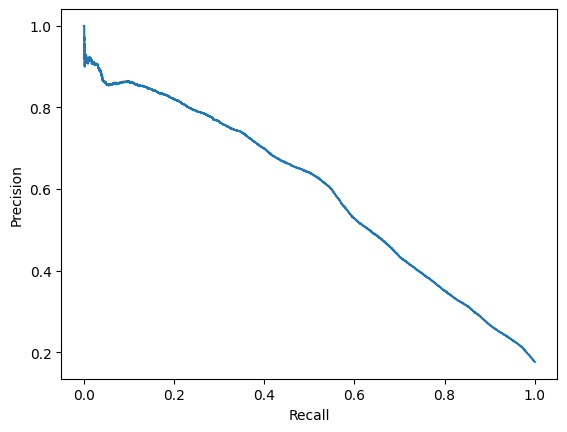

In [ ]:
y_pred_curve = logreg.predict_proba(X_test_scaled)
y_pred_curve = y_pred_curve[:,1]
precision, recall, threshold = precision_recall_curve(y_test,
                                                      y_pred_curve)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()
plt.show()

In [ ]:
y_proba = logreg.predict_proba(X_test_scaled)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test.values, y_proba)
df_thresolds = pd.DataFrame({'Precision': precision[:-1], 'Recall': recall[:-1], 'Threshold': thresholds})
df_thresolds[df_thresolds['Recall'].between(.80, .85)]

,Precision,Recall,Threshold
76871,0.313656,0.849986,0.301425
76872,0.313648,0.849954,0.301432
76873,0.313644,0.849922,0.301436
76874,0.313647,0.849922,0.301445
76875,0.313651,0.849922,0.301446
...,...,...,...
88853,0.350968,0.800013,0.379556
88854,0.350978,0.800013,0.379558
88855,0.350983,0.800013,0.379571
88856,0.350988,0.800013,0.379582


Langkah selanjutnya, jika sudah diketahui nilai thresholds. Kita bisa melakukan prediksi menggunakan nilai tersebut untuk menaikkan recall. target recall untuk saat ini adalah 85%, yang artinya kita akan menurunkan thresholds mencapai angka 0.3

In [ ]:
improved_pred = np.where(y_proba>0.3, 1, 0)
confusion_matrix(y_test,improved_pred)

array([[87714, 58297],
       [ 4662, 26575]], dtype=int64)

Nilai Recall setelah improvisasi adalah sebagai berikut:

In [ ]:
improved_recall = recall_score(y_test,improved_pred)
improved_recall

0.8507539136280693

Kita telah berhasil menaikkan recall hingga sebanyak 85%, hal ini juga terdapat trade-off atau pertukaran yang harus dibayar, yaitu jika kita mengecilkan nilai threshold untuk menaikkan recall, maka nilai precision juga akan turun. Yang mana precision tersebut akan berhubungan dengan orang-orang yang sebenarnya bisa bayar, namun diprediksi tidak bisa bayar. Kita akan sedikit kehilangan potensi untuk meminjamkan uang kepada mereka

## 9. Feature Importances

<Axes: ylabel='Feature'>

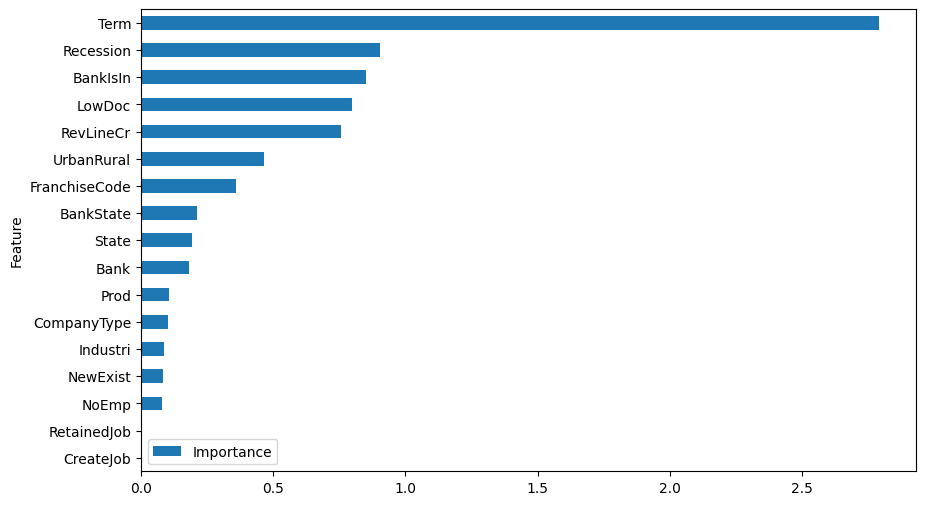

In [ ]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Berikut beberapa insight yang dapat diambil dari gambar tersebut:

1. **Fitur "Term"**: Fitur ini memiliki tingkat kepentingan tertinggi, menunjukkan bahwa durasi (term) dari suatu pinjaman adalah faktor yang paling signifikan dalam model ini. Ini mungkin berarti bahwa lamanya waktu pinjaman atau proyek sangat mempengaruhi hasil yang diprediksi oleh model.

2. **Fitur "Recesion"**: Adanya resesi merupakan fitur terpenting kedua. Hal ini menunjukkan bahwa kemerosotan ekonomi mempunyai dampak besar terhadap hasil prediksi.

3. **Fitur "BankISln"**: Merupakan fitur yang menandakan peminjam dan bank berada pada suatu wilayah atau state yang sama

4. **Fitur "Lowdoc dan RevLineCr"**: Menunjukkan bahwa persyaratan dokumentasi atau adanya proses dokumentasi minim (LowDoc) memainkan peran penting dalam model.

5. **Fitur lain**: Fitur-fitur seperti "UrbanRural", "FranchiseCode", "BankState", "State", "Bank", dan lainnya memiliki tingkat kepentingan yang lebih rendah tetapi masih memberikan kontribusi terhadap model.


## 9. Insight and Business Recommendation

In [ ]:
cm_lg = confusion_matrix(y_test,improved_pred)
cm_lg

array([[87714, 58297],
       [ 4662, 26575]], dtype=int64)

In [ ]:
TP = cm_lg[0][0]
FN = cm_lg[1][0]
FP = cm_lg[0][1]
TN = cm_lg[1][1]

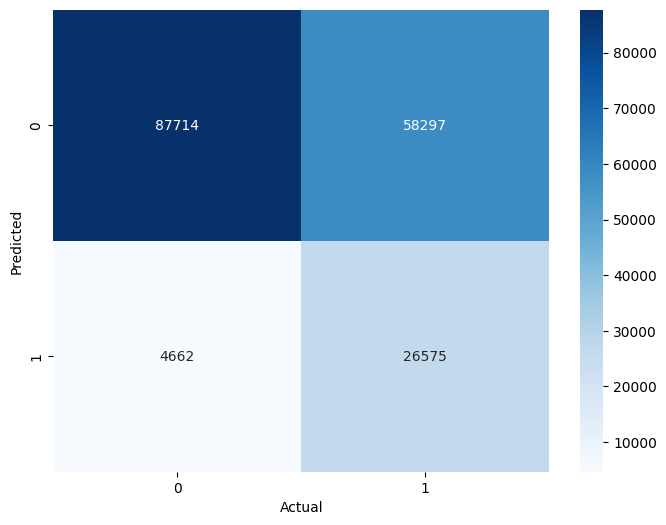

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues')  # Menggunakan fmt='d' untuk angka tanpa notasi ilmiah
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Result

Dapat dilihat dengan model yang telah dibuat:

- TP(87714) = Model sukses memprediksi positif (ChgOff) dan kenyataanya benar ChgOff
- TN(26575) = Model sukses memprediksi negatif (Tidak ChgOff) dan kenyataannya benar tidak ChgOff
- FP(58297) = Model memprediksi positif (ChgOff) tapi kenyataannya tidak ChgOff
- FN(4662) = Model memprediksi negatif (Tidak ChgOff) tapi kenyataannya ChgOff


In [ ]:
persentase_kesalahan_model = (FN / (TP+FP+TN+FN)) * 100

print(f'Persentase kesalahan prediksi gagal bayar model : {persentase_kesalahan_model:.2f}%')

Persentase kesalahan prediksi gagal bayar model : 2.63%


## Kesimpulan Bisnis pada Confussion Matrix

1. Mengacu pada business metrics kami pada awal project yaitu tentang ``Loan Default Rate``, Sebelum dilakukan modeling kita memeiliki persentase gagal bayar sebanyak ``17,61%`` yang mana sangat tinggi, Hampir mencapai 18%
2. Setelah dilakukannya modeling, terjadi penurunan yang cukup masif pada persentase chargeoff, yaitu sekitar ``2.63%``. Penurunan ini sangatlah besar sehingga besar kemungkinan untuk menurunkan kerugian meminjamkan uang kepada orang yang tidak bisa membayar
3. Kerugian sebelum menggunakan model adalah sebanyak ``185.000.000 USD``, namun setelah menggunakan model hanya terdapat ``2.63%`` prediksi saja yang salah. yang mana angka ini akan menjadi ``27.650.000 USD``
4. Kerugian ini turun sebanyak ``157.350.000 USD``, yang mana turun 85% dari total kerugian
5. Berdasarkan penjabaran diatas, kami telah berhasil untuk memenuhi objektif awal dari business metrics, yaitu untuk mengurangi nilai kerugian awal dan mengurangi persentase peminjam yang default
6. Angka ``185.000.000 USD`` diperoleh dari penjumlahan kolom ChgOffPrinGr pada dataset
6. Untuk perhitungan kerugian awal dan kerugian akhir bisa dilihat pada perhitungan berikut ini:

<img src="https://gcdnb.pbrd.co/images/ODvghzCllAlz.png?o=1">

Kesimpulan Rekomendasi Bisnis

Jadi, dari semua uraian diatas kami menemukan kesimpulan berupa rekomendasi bisnis sebagai berikut:

- Mengembangkan Layanan Pinjaman Jangka Panjang. Dengan cara, Bank dapat menawarkan produk pinjaman dengan durasi yang lebih lama dengan suku bunga yang bersaing. karena rata-rata charge off terjadi pada peminjaman dengan jangka waktu yang pendek yaitu 0 sampai 60
- Menyeleksi lebih ketat untuk industri yang memiliki persentasi gagal bayar yang tinggi seperti industri Real estate dan Finance Insurance, hal ini bisa diterapkan dengan tidak menetapkan sistem lowdoc khusus pada 2 industri tersebut
- Fokus pemberian jaminan pinjaman pada sektor Pertambangan dan Perminyakan karena persentase gagal bayar rendah. Dapat diberikan jalur khusus pada sektor tersebut untuk mendorong jumlah pengajuan jaminan pinjaman.
- Penting bagi para pemberi pinjaman untuk lebih berhati-hati dalam mengambil keputusan untuk meminjamkan uang jika sedang terjadi krisis ekonomi pada daerah / tempat yang bersangkutan